In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Sample data , math vaneko x rey and science vaneko y
students = ['1', '2', '3', '4', '5']
maths = [92, 78, 85, 70, 60]
science = [88, 82, 90, 65, 68]

In [5]:
# Means
mean_x = sum(maths) / len(maths)
mean_y = sum(science) / len(science)

# Centered variables
x = [xi - mean_x for xi in maths]
y = [yi - mean_y for yi in science]

# Squares & cross‑products
x2 = [i**2 for i in x]
y2 = [i**2 for i in y]
xy = [x[i] * y[i] for i in range(len(x))]

In [7]:
# Tabulate the calculations
df = pd.DataFrame({
    'Student': students,
    'Maths (X)': maths,
    'Science (Y)': science,
    f'x = X - {mean_x:.1f}': x,
    f'y = Y - {mean_y:.1f}': y,
    'x²': x2,
    'y²': y2,
    'x·y': xy
})

df.loc['Total'] = [''] * 3 + [''] * 2 + [sum(x2), sum(y2), sum(xy)]
df

,Student,Maths (X),Science (Y),x = X - 77.0,y = Y - 78.6,x²,y²,x·y
0,1,92,88,15.0,9.4,225.0,88.36,141.0
1,2,78,82,1.0,3.4,1.0,11.56,3.4
2,3,85,90,8.0,11.4,64.0,129.96,91.2
3,4,70,65,-7.0,-13.6,49.0,184.96,95.2
4,5,60,68,-17.0,-10.6,289.0,112.36,180.2
Total,,,,,,628.0,527.20,511.0


In [9]:
# Compute slope (b) and intercept (a)
b = sum(xy) / sum(x2)
a = mean_y - b * mean_x
print(f"Regression Equation: Y = {a:.2f} + {b:.3f} * X")

Regression Equation: Y = 15.95 + 0.814 * X


In [11]:
# Example prediction: expected Science score for Maths = 75
X_new = 75
Y_pred = a + b * X_new
print(f"Predicted Science marks for Maths = {X_new}: {Y_pred:.2f}")

Predicted Science marks for Maths = 75: 76.97


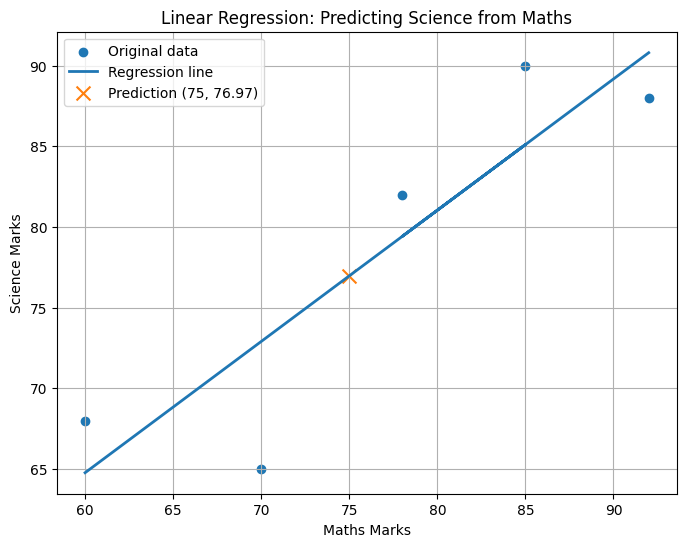

In [12]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(maths, science, label='Original data')
plt.plot(maths, [a + b*x for x in maths], label='Regression line', linewidth=2)
plt.scatter(X_new, Y_pred, marker='x', s=100, label=f'Prediction ({X_new}, {Y_pred:.2f})')

plt.xlabel('Maths Marks')
plt.ylabel('Science Marks')
plt.title('Linear Regression: Predicting Science from Maths')
plt.legend()
plt.grid(True)
plt.show()